<a href="https://colab.research.google.com/github/blelowww/sql-er/blob/master/sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# จรัสพงศ์ เทพรอด 6030804921


In [17]:
# CREATING THE TABLE
import pandas as pd
import sqlite3
conn = sqlite3.connect('sqlhw.db')
conn.execute('''
CREATE TABLE IF NOT EXISTS sensor (
	id CHAR(3) PRIMARY KEY NOT NULL,
	name CHAR(50) NOT NULL ,
  place CHAR(50) NOT NULL
);''')

conn.execute('''
CREATE TABLE data (
	id CHAR(3) NOT NULL,
	date_time datetime NOT NULL,
	pm INTEGER NOT NULL ,
	temp INTEGER NOT NULL 
		CONSTRAINT fk_dat_ID REFERENCES sens(sen_ID));''')
conn.commit()
print("Table created successfully")

Table created successfully


In [42]:
#add sensor
conn.execute("INSERT INTO sensor(id,place,name) VALUES('1','Bangkok','Sensor 1');")
conn.execute("INSERT INTO sensor(id,place,name) VALUES('2','Nonthaburi','Sensor 2');")
conn.execute("INSERT INTO sensor(id,place,name) VALUES('3','Trat','Sensor 3');")
conn.execute("INSERT INTO sensor(id,place,name) VALUES('4','Phuket','Sensor 4');")
conn.execute("INSERT INTO sensor(id,place,name) VALUES('5','Pattaya','Sensor 5');")

In [43]:
pd.read_sql_query("SELECT * FROM sensor", conn)

,id,name,place
0,1,Sensor 1,Bangkok
1,2,Sensor 2,Nonthaburi
2,3,Sensor 3,Trat
3,4,Sensor 4,Phuket
4,5,Sensor 5,Pattaya


In [44]:
#add data in each sensor
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','1/1/2020 8:00:00',100,34);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','2/1/2020 12:00:00',120,40);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','3/1/2020 16:00:00',118,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','1/1/2020 8:00:00',102,38);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','2/1/2020 12:00:00',112,39);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','3/1/2020 16:00:00',108,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','1/1/2020 8:00:00',100,33);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','2/1/2020 12:00:00',90,39);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','3/1/2020 16:00:00',96,37);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','1/1/2020 8:00:00',108,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','2/1/2020 12:00:00',106,42);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','3/1/2020 16:00:00',103,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','1/1/2020 8:00:00',70,39);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','2/1/2020 12:00:00',83,45);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','3/1/2020 16:00:00',85,34);")

In [45]:
pd.read_sql_query("SELECT * FROM data", conn)

,id,date_time,pm,temp
0,1,1/1/2020 8:00:00,100,34
1,1,2/1/2020 12:00:00,120,40
2,1,3/1/2020 16:00:00,118,36
3,2,1/1/2020 8:00:00,102,38
4,2,2/1/2020 12:00:00,112,39
5,2,3/1/2020 16:00:00,108,36
6,3,1/1/2020 8:00:00,100,33
7,3,2/1/2020 12:00:00,90,39
8,3,3/1/2020 16:00:00,96,37
9,4,1/1/2020 8:00:00,108,36


In [46]:
#join table with mutual id
pd.read_sql_query('''SELECT s.id,s.name,s.place,d.date_time,d.pm,d.temp 
FROM sensor s
INNER JOIN data d ON s.id = d.id 
ORDER BY s.name asc;''', conn)

,id,name,place,date_time,pm,temp
0,1,Sensor 1,Bangkok,1/1/2020 8:00:00,100,34
1,1,Sensor 1,Bangkok,2/1/2020 12:00:00,120,40
2,1,Sensor 1,Bangkok,3/1/2020 16:00:00,118,36
3,2,Sensor 2,Nonthaburi,1/1/2020 8:00:00,102,38
4,2,Sensor 2,Nonthaburi,2/1/2020 12:00:00,112,39
5,2,Sensor 2,Nonthaburi,3/1/2020 16:00:00,108,36
6,3,Sensor 3,Trat,1/1/2020 8:00:00,100,33
7,3,Sensor 3,Trat,2/1/2020 12:00:00,90,39
8,3,Sensor 3,Trat,3/1/2020 16:00:00,96,37
9,4,Sensor 4,Phuket,1/1/2020 8:00:00,108,36


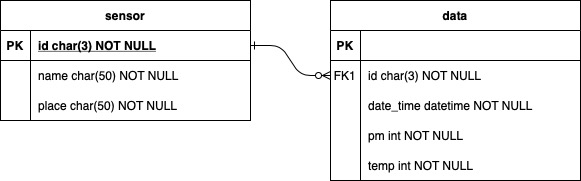